In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [3]:
START = "2009-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [4]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,124.262497,127.175003,123.537498,124.574997,92.310822,5375740
1,2009-01-05,125.500000,130.750000,124.500000,128.812500,95.450806,4829776
2,2009-01-06,128.750000,130.500000,124.562500,126.599998,93.811340,5918992
3,2009-01-07,129.750000,129.949997,116.150002,126.199997,93.514908,9013828
4,2009-01-09,124.974998,137.449997,121.250000,134.237503,99.470795,14219980


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,124.262497,127.175003,123.537498,124.574997,5375740
1,125.500000,130.750000,124.500000,128.812500,4829776
2,128.750000,130.500000,124.562500,126.599998,5918992
3,129.750000,129.949997,116.150002,126.199997,9013828
4,124.974998,137.449997,121.250000,134.237503,14219980


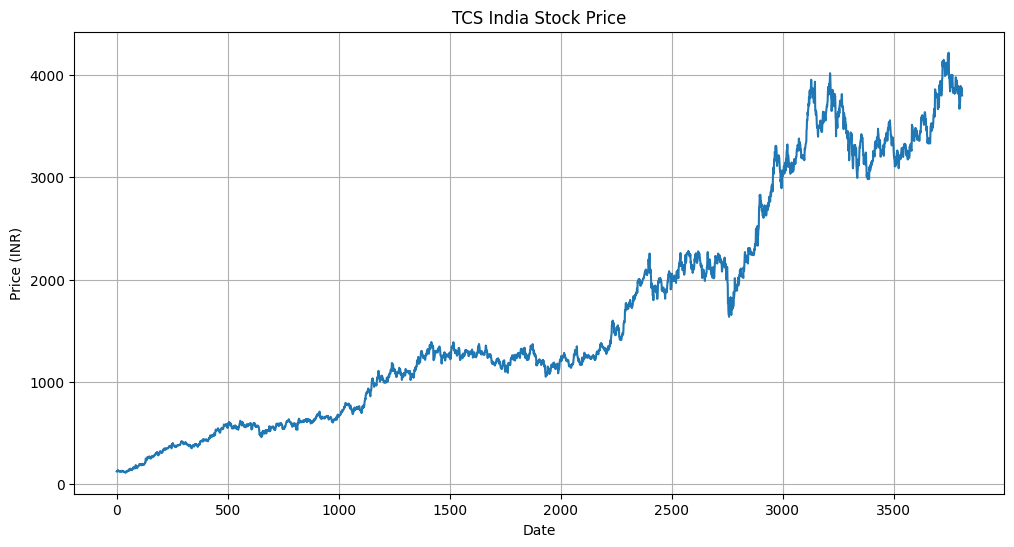

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [7]:
df

,Open,High,Low,Close,Volume
0,124.262497,127.175003,123.537498,124.574997,5375740
1,125.500000,130.750000,124.500000,128.812500,4829776
2,128.750000,130.500000,124.562500,126.599998,5918992
3,129.750000,129.949997,116.150002,126.199997,9013828
4,124.974998,137.449997,121.250000,134.237503,14219980
...,...,...,...,...,...
3805,3874.399902,3893.500000,3827.449951,3831.649902,2177001
3806,3856.800049,3890.000000,3852.000000,3878.149902,1932323
3807,3889.000000,3889.000000,3828.000000,3832.050049,1860730
3808,3826.050049,3842.000000,3795.050049,3815.100098,1774045


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3805    3943.017507
3806    3942.971006
3807    3942.253506
3808    3941.791506
3809    3940.962505
Name: Close, Length: 3810, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

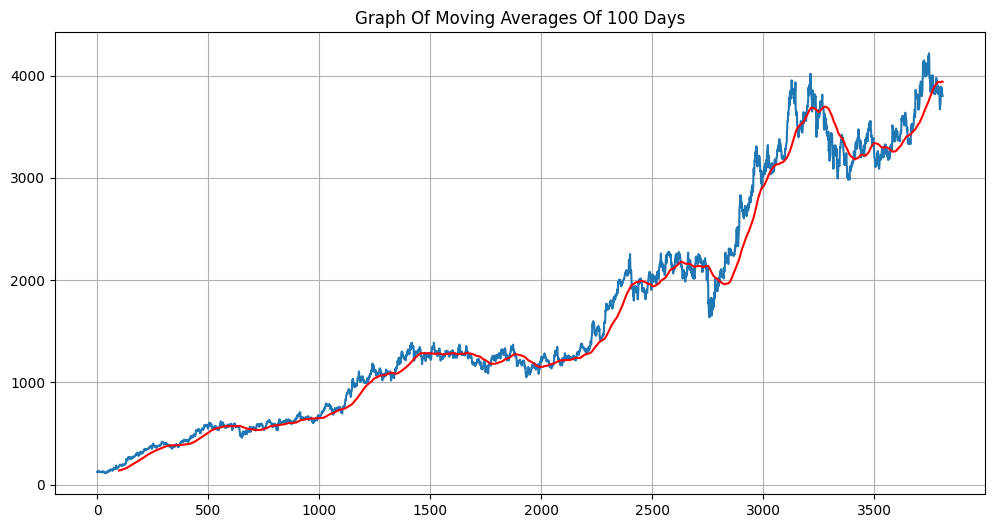

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3805    3741.363752
3806    3743.575752
3807    3745.900502
3808    3747.967753
3809    3750.065503
Name: Close, Length: 3810, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

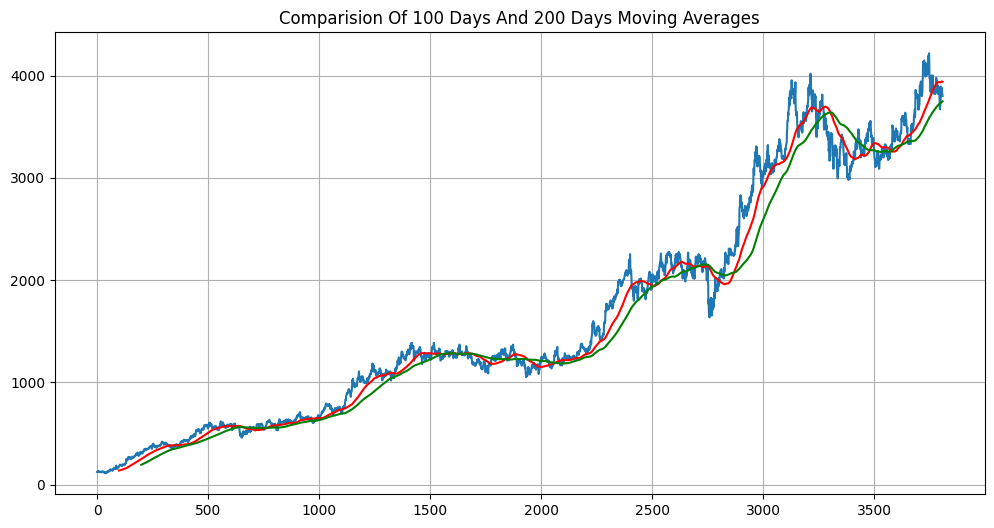

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [12]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2667, 7)
(1143, 7)


In [13]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,124.262497,127.175003,123.537498,124.574997,92.310822,5375740
1,2009-01-05,125.500000,130.750000,124.500000,128.812500,95.450806,4829776
2,2009-01-06,128.750000,130.500000,124.562500,126.599998,93.811340,5918992
3,2009-01-07,129.750000,129.949997,116.150002,126.199997,93.514908,9013828
4,2009-01-09,124.974998,137.449997,121.250000,134.237503,99.470795,14219980


In [14]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2667,2019-11-06,2200.000000,2210.800049,2179.000000,2188.500000,2004.030762,2540719
2668,2019-11-07,2204.500000,2204.500000,2175.199951,2185.350098,2001.146362,1915598
2669,2019-11-08,2189.600098,2189.600098,2124.000000,2129.949951,1950.415894,2788759
2670,2019-11-11,2135.000000,2139.000000,2091.000000,2100.949951,1923.860352,2983768
2671,2019-11-13,2118.000000,2183.800049,2118.000000,2178.600098,1994.965576,3823365


In [15]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [18]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.00601228],
       [0.00796829],
       [0.00694701],
       ...,
       [0.96443406],
       [0.961226  ],
       [0.96487267]])

In [19]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [20]:
x_train.shape

(2567, 100, 1)

In [21]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\Mrinal\OneDrive\Desktop\Stock-Price-Prediction-using-LSTM-FASTAPI-Streamlit\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 15s 123ms/step - loss: 0.0808 - mean_absolute_error: 0.2034
Epoch 2/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - loss: 0.0077 - mean_absolute_error: 0.0629
Epoch 3/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - loss: 0.0082 - mean_absolute_error: 0.0626
Epoch 4/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - loss: 0.0061 - mean_absolute_error: 0.0545
Epoch 5/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - loss: 0.0062 - mean_absolute_error: 0.0557
Epoch 6/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - loss: 0.0061 - mean_absolute_error: 0.0556
Epoch 7/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step - loss: 0.0047 - mean_absolute_error: 0.0477
Epoch 8/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - loss: 0.0048 - mean_absolute_error: 0.0490
Epoch 9/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - loss: 0.0045 - mean_absolute_error: 0.0471
Epoch 10/100
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 152ms/step - loss: 0.0043 - mean_absolute_error: 0.0453
Epoch 11/1

In [25]:
model.save('keras_model.h5')

In [26]:
test_close.shape

(1143, 1)

In [27]:
past_100_days = pd.DataFrame(train_close[-100:])

In [28]:
test_df = pd.DataFrame(test_close)

In [29]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [30]:
print(type(past_100_days))


<class 'pandas.core.frame.DataFrame'>


In [31]:
final_df.head()

,0
0,2231.500000
1,2252.800049
2,2260.899902
3,2254.100098
4,2254.500000


In [32]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.2304193 ],
       [0.23866587],
       [0.24180182],
       ...,
       [0.850091  ],
       [0.84352863],
       [0.83834061]])

In [33]:
input_data.shape

(1243, 1)

In [34]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [35]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1143, 100, 1)
(1143,)


In [36]:
y_pred = model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step


In [37]:
y_pred.shape

(1143, 1)

In [38]:
y_test

array([0.21377135, 0.21255183, 0.19110301, ..., 0.850091  , 0.84352863,
       0.83834061])

In [39]:
y_pred

array([[0.2572742 ],
       [0.2613169 ],
       [0.2651807 ],
       ...,
       [0.87026906],
       [0.8707309 ],
       [0.868574  ]], dtype=float32)

In [40]:
scaler.scale_

array([0.00038716])

In [42]:
scale_factor = 1/0.00038716
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

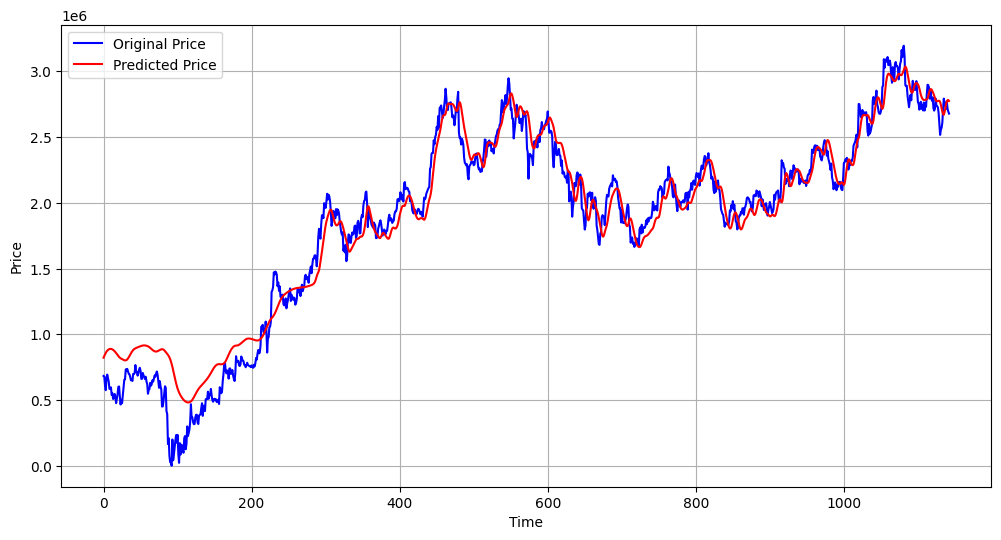

In [43]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 6.40%


In [46]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.954966950941996


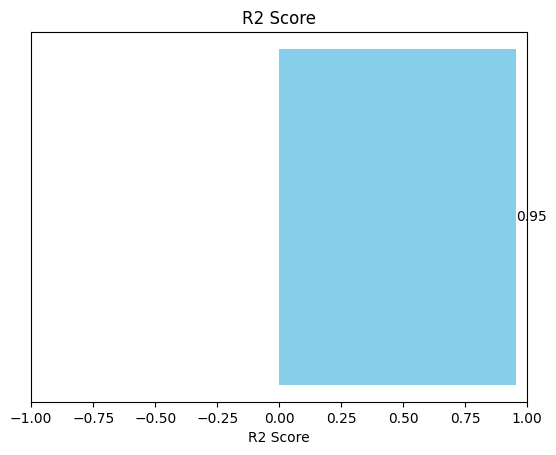

In [47]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

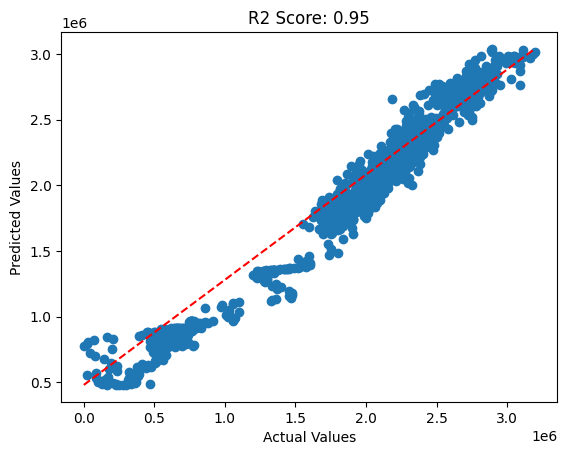

In [48]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()